<a href="https://colab.research.google.com/github/zhaideri/theprojects/blob/main/Proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most prevalent products:
VR goggles                  535
Silicon Ornament            517
Flatscreen TV               512
Hologram                    490
Universal Charging Cable    486
Headphones                  460
Name: count, dtype: int64
Frequency of large baskets (more than 1 items): 1.00
Large buyers (customers with multiple large baskets):
Customer ID
100    3
101    3
102    3
103    3
104    3
      ..
595    3
596    3
597    3
598    3
599    3
Name: Order ID, Length: 500, dtype: int64
Stores containing large-basket buyers and their frequency:
Store ID
1    300
2    300
3    300
4    300
5    300
Name: Order ID, dtype: int64


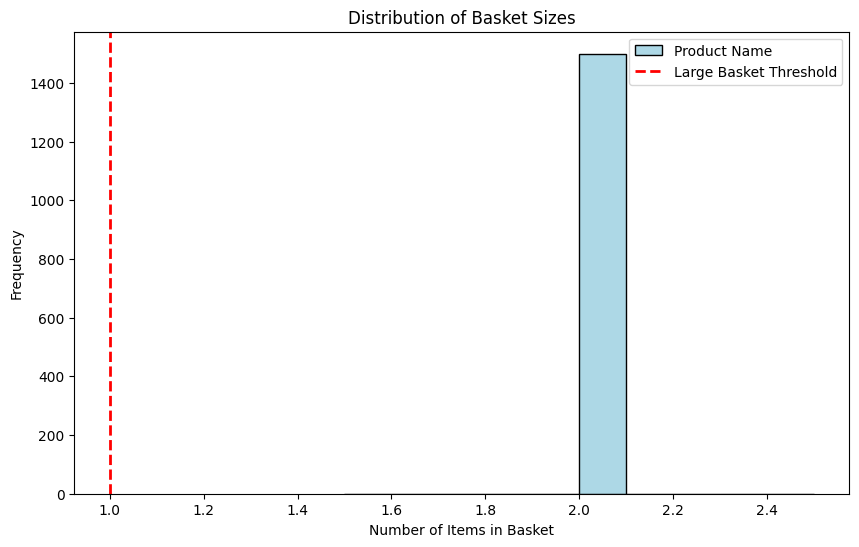

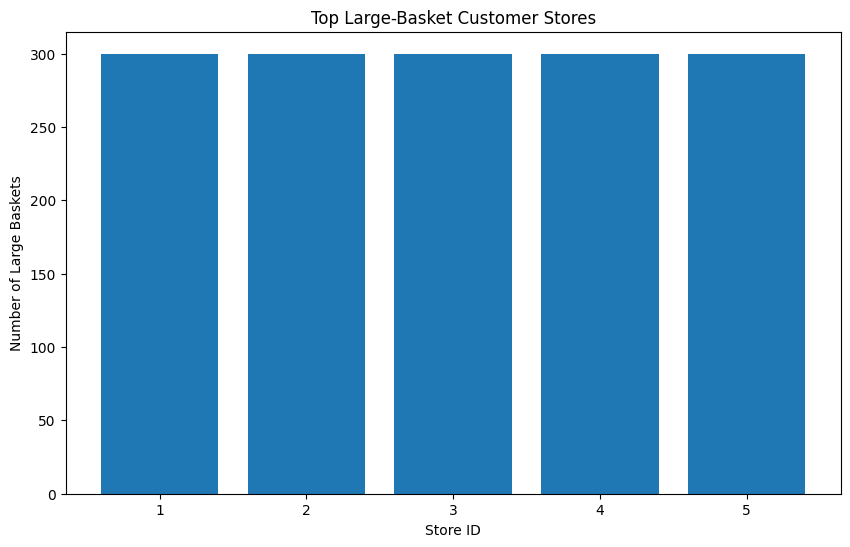

Top products in large baskets:
VR goggles                  535
Silicon Ornament            517
Flatscreen TV               512
Hologram                    490
Universal Charging Cable    486
Headphones                  460
Name: count, dtype: int64


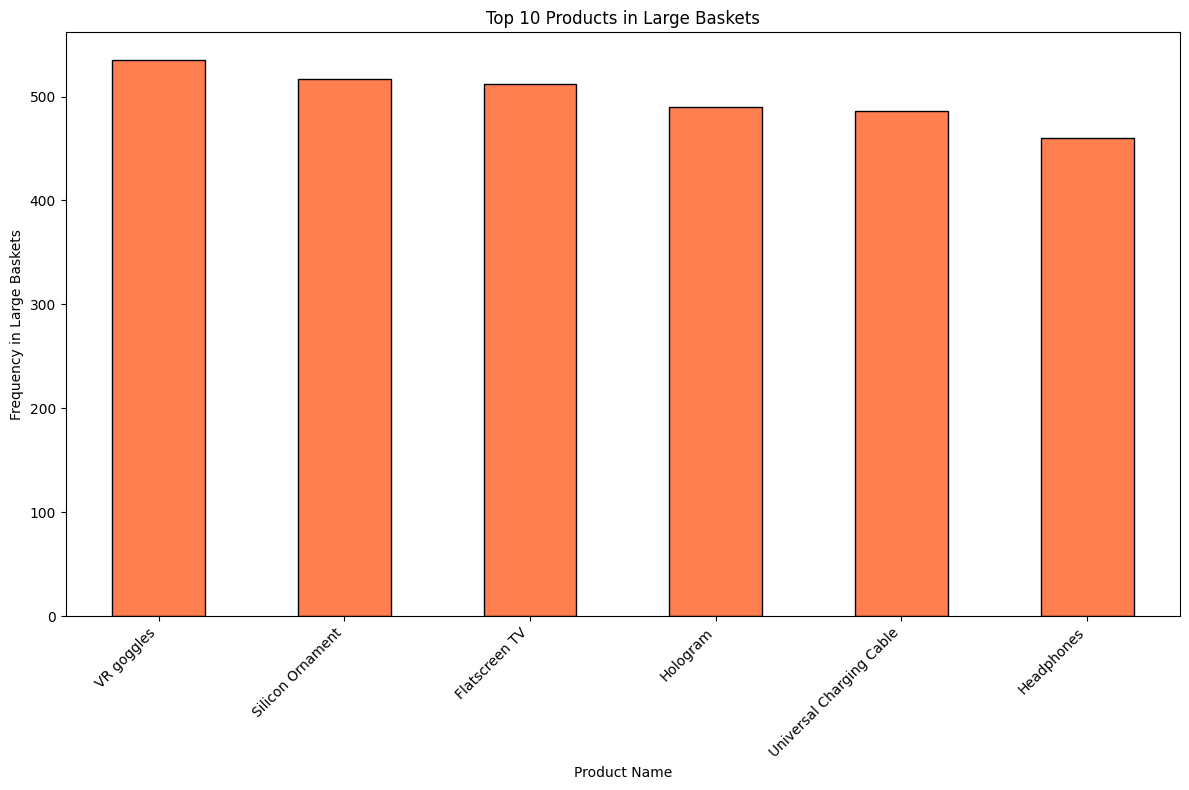

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib.pyplot here

# Replace 'your_file.csv' with the name of your file
df = pd.read_csv('zain_data.csv')

# Group by OrderID and get the list of products in each order
order_products = df.groupby('Order ID')['Product Name'].apply(list)

# Count the frequency of each product across all orders
product_frequency = pd.Series([product for sublist in order_products for product in sublist]).value_counts()

# Display the most prevalent products
print("Most prevalent products:")
print(product_frequency.head(10))  # Top 10 products


# Define a threshold for a "large basket" (e.g., more than 3 items)
large_basket_threshold = 1

# Calculate basket sizes for each order
basket_sizes = df.groupby('Order ID')['Product Name'].count()

# Identify large baskets
large_baskets = basket_sizes[basket_sizes > large_basket_threshold]

# Calculate the frequency of large baskets
large_basket_frequency = len(large_baskets) / len(basket_sizes)

print(f"Frequency of large baskets (more than {large_basket_threshold} items): {large_basket_frequency:.2f}")

# Identify large buyers (customers with multiple large baskets)
large_buyers = df[df['Order ID'].isin(large_baskets.index)].groupby('Customer ID')['Order ID'].nunique()
large_buyers = large_buyers[large_buyers > 1]  # Customers with more than 1 large basket

print("Large buyers (customers with multiple large baskets):")
print(large_buyers)

# Filter the data for large basket orders
large_basket_orders = df[df['Order ID'].isin(large_baskets.index)]

# Group by StoreID and count the number of large baskets
store_large_baskets = large_basket_orders.groupby('Store ID')['Order ID'].nunique()

print("Stores containing large-basket buyers and their frequency:")
print(store_large_baskets)

# 1. Histogram of Basket Sizes
plt.figure(figsize=(10, 6))
basket_sizes.plot(kind='hist', bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Basket Sizes')
plt.xlabel('Number of Items in Basket')
plt.ylabel('Frequency')
plt.axvline(large_basket_threshold, color='red', linestyle='dashed', linewidth=2, label='Large Basket Threshold')
plt.legend()
plt.show()


import matplotlib.pyplot as plt

# Sort the stores by large basket frequency
store_large_baskets = store_large_baskets.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(store_large_baskets.index, store_large_baskets.values)
plt.xlabel("Store ID")
plt.ylabel("Number of Large Baskets")
plt.title("Top Large-Basket Customer Stores")
plt.xticks(store_large_baskets.index)
plt.show()




# Get the products in large baskets
large_basket_products = large_basket_orders.groupby('Order ID')['Product Name'].apply(list)

# Count the frequency of each product in large baskets
product_frequency_large_baskets = pd.Series([product for sublist in large_basket_products for product in sublist]).value_counts()

print("Top products in large baskets:")
print(product_frequency_large_baskets.head(10))  # Top 10 products




import matplotlib.pyplot as plt

# Plot the top 10 products in large baskets
plt.figure(figsize=(12, 8))
product_frequency_large_baskets.head(10).plot(kind='bar', color='coral', edgecolor='black')

# Add titles and labels
plt.title('Top 10 Products in Large Baskets')
plt.xlabel('Product Name')
plt.ylabel('Frequency in Large Baskets')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


# Assuming '